<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/final_Project_Classification_bank_personal_loan_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import Data

In [ ]:
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 1. Data Understanding



In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
round(df[["Age","Income","Experience","Mortgage","Personal Loan"]].describe(), 2)

,Age,Income,Experience,Mortgage,Personal Loan
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,45.34,73.77,20.10,56.50,0.10
std,11.46,46.03,11.47,101.71,0.29
min,23.00,8.00,-3.00,0.00,0.00
25%,35.00,39.00,10.00,0.00,0.00
50%,45.00,64.00,20.00,0.00,0.00
75%,55.00,98.00,30.00,101.00,0.00
max,67.00,224.00,43.00,635.00,1.00


In [ ]:
df["Personal Loan"].sum()

480

In [ ]:
df["Personal Loan"].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

# 2. Cleaning Data

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# 3. Exploratory Data Analysis (EDA)

In [ ]:
selected_columns = ["Age", "Income", "Experience", "Mortgage"]

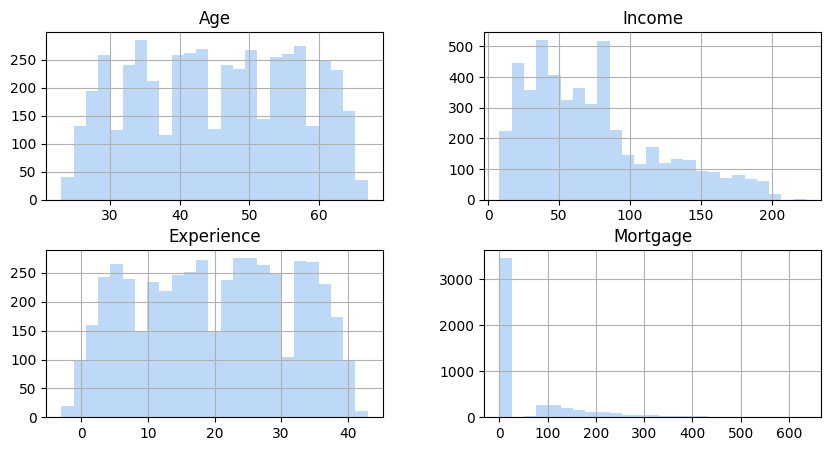

In [ ]:
df[selected_columns].hist(figsize = (10, 5), bins = 25, alpha = 0.7)
plt.show()

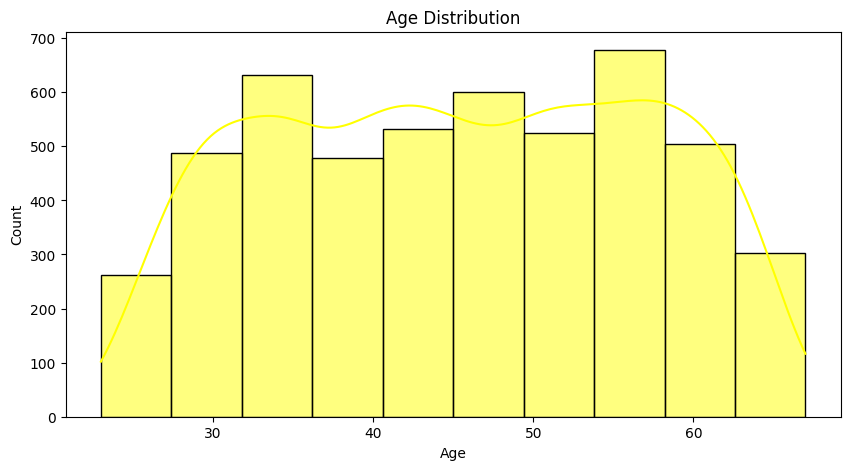

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x = df["Age"], bins = 10, kde = True, color = "Yellow")

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

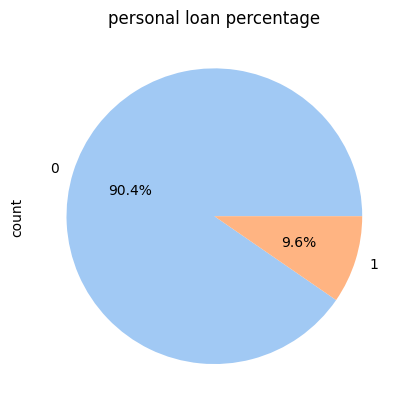

In [ ]:
sns.set_palette("pastel")
df["Personal Loan"]. value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("personal loan percentage")
plt.show()

<ipython-input-140-0c2142288d09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x = "CreditCard", palette = "pastel")


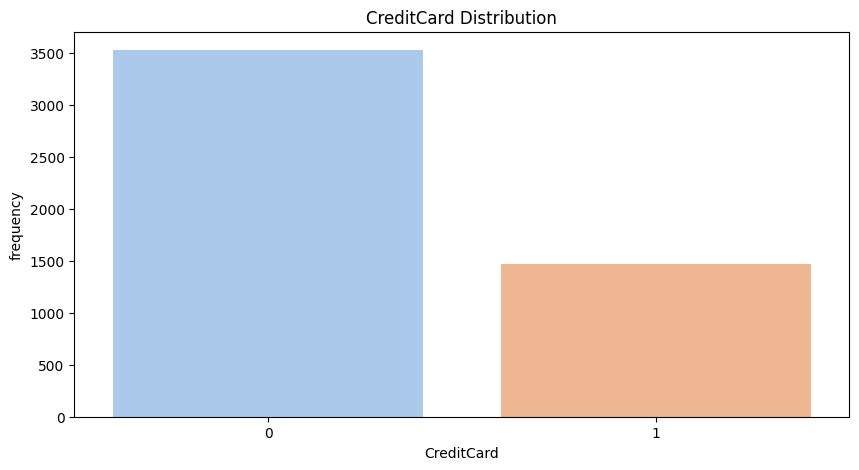

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x = "CreditCard", palette = "pastel")

plt.title("CreditCard Distribution")
plt.xlabel("CreditCard")
plt.ylabel("frequency")
plt.show()

In [ ]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


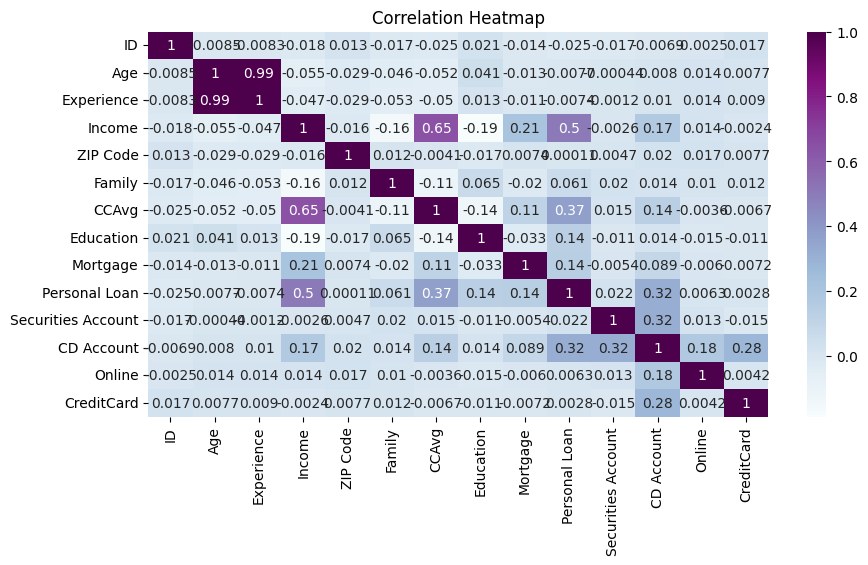

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot = True, cmap = "BuPu")

plt.title("Correlation Heatmap")
plt.show()

# 5. Data Preparation

In [ ]:
df = df.drop(columns = ["ID", "ZIP Code"], axis = 1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
X = df.drop(["Age", "Income", "Experience" ,"Mortgage", "Family","Education"], axis = 1)

y = df["Personal Loan"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 6), (1000, 6), (4000,), (1000,))

# 6. Modelling & Evaluation

In [ ]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [ ]:
model_lr = RandomForestClassifier()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

In [ ]:
model_dt = RandomForestClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

In [ ]:
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00       105

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00       105

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00       105

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00       105

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



# 6. Testing

In [ ]:
testing = { "Age": [35], "Income": [50], "CreditCard": [1]}

testing = pd.DataFrame(testing)
testing

,Age,Income,CreditCard
0,35,50,1


# Deep Learning

In [ ]:
import tensorflow as tf

In [ ]:
X = df.iloc[:, 1:].values
y = df["Personal Loan"].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
jumlahKolomData = df.iloc[:, 1:].shape[1]
jumlahKolomData

11

In [ ]:
model_1 = tf.keras.models.Sequential([

    # Input
    tf.keras.layers.Input(shape = (jumlahKolomData)),

    tf.keras.layers.Dense(60, activation = "relu"),
    tf.keras.layers.Dense(60, activation = "relu"),

    # Output
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [ ]:
model_1.compile(optimizer = "Adam",
                loss = "binary_crossentropy",
                metrics = ["accuracy"])

In [ ]:
history_1 = model_1.fit(X_train,
                        y_train,
                        validation_data = (X_test, y_test),
                        epochs = 10)

Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.1855 - accuracy: 0.9341 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 2/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 3/10
118/118 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 8.1069e-04 - val_accuracy: 1.0000
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 6.0253e-04 - accuracy: 1.0000 - val_loss: 5.1209e-04 - val_accuracy: 1.0000
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 3.9444e-04 - accuracy: 1.0000 - val_loss: 3.4910e-04 - val_accuracy: 1.0000
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 2.7780e-04 - accuracy: 1.0000 - val_loss: 2.5495e-04 -

In [ ]:
y_pred = model_1.predict(X_test)
prediction = np.argmax(y_pred, axis = 1)
prediction

40/40 [==============================] - 0s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1250
           1       0.00      0.00      0.00         0

    accuracy                           0.89      1250
   macro avg       0.50      0.45      0.47      1250
weighted avg       1.00      0.89      0.94      1250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


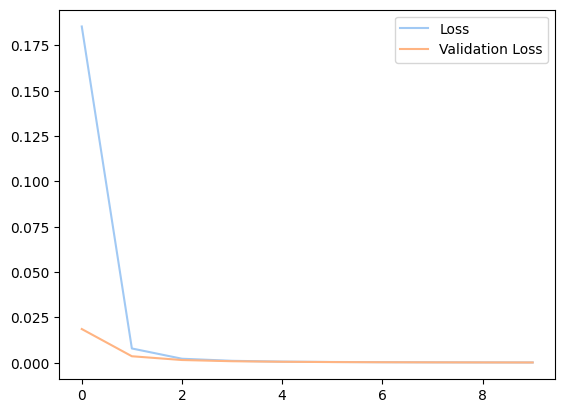

In [ ]:
plt.plot(history_1.history["loss"], label = "Loss") # train
plt.plot(history_1.history["val_loss"], label = "Validation Loss") # test
plt.legend()
plt.show()

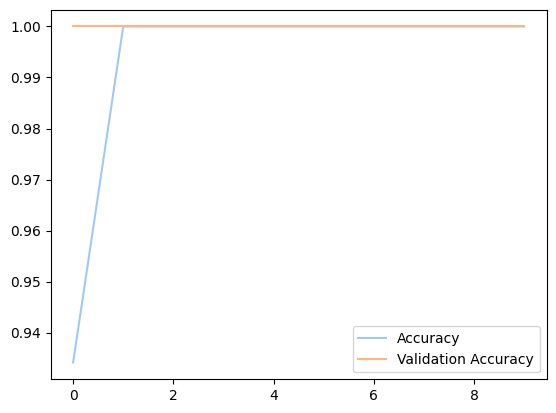

In [ ]:
plt.plot(history_1.history["accuracy"], label = "Accuracy") # train
plt.plot(history_1.history["val_accuracy"], label = "Validation Accuracy") # test
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model_1.evaluate(X_test, y_test)
loss, accuracy

40/40 [==============================] - 0s 1ms/step - loss: 1.1913e-04 - accuracy: 1.0000


(0.00011913250637007877, 1.0)